# Import Data From Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mirzahasnine/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset
License(s): DbCL-1.0
  0% 0.00/61.2k [00:00<?, ?B/s]
100% 61.2k/61.2k [00:00<00:00, 50.6MB/s]


In [ ]:
!unzip /content/heart-disease-dataset.zip

Archive:  /content/heart-disease-dataset.zip
  inflating: heart_disease.csv       


# Import Libraries Needed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics  import confusion_matrix ,accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay

# Import Data

In [ ]:
path = '/content/heart_disease.csv'
df = pd.read_csv(path)

# Data Exploration

In [ ]:
df.sample(15)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
282,Female,35,primaryschool,0,0.0,0.0,no,0,0,208.0,122.5,72.5,22.00,65.0,NaN,No
2147,Female,59,graduate,0,0.0,0.0,no,0,0,293.0,124.0,74.0,25.56,72.0,77.0,No
1123,Male,64,postgraduate,0,0.0,0.0,no,0,1,251.0,133.0,72.5,24.28,65.0,86.0,No
4021,Male,53,uneducated,1,40.0,0.0,no,0,0,232.0,136.0,73.0,22.26,73.0,73.0,No
3522,Female,43,uneducated,1,25.0,0.0,no,1,0,258.0,161.5,96.0,38.96,88.0,84.0,No
965,Male,52,graduate,1,20.0,0.0,no,0,0,265.0,106.0,79.0,26.48,80.0,163.0,yes
980,Female,55,NaN,1,10.0,0.0,no,0,0,196.0,115.0,71.0,22.19,105.0,85.0,No
1096,Female,52,uneducated,1,10.0,0.0,no,0,0,246.0,113.5,66.5,19.47,85.0,60.0,No
1874,Female,62,postgraduate,1,3.0,0.0,no,1,0,298.0,137.0,85.0,26.73,76.0,87.0,No
608,Male,42,uneducated,1,35.0,0.0,no,0,0,218.0,116.0,86.0,17.81,85.0,69.0,No


In [ ]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [ ]:
df.tail()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No
4237,Female,52,primaryschool,0,0.0,0.0,no,0,0,269.0,133.5,83.0,21.47,80.0,107.0,No


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


## Show missing and duplicated values

In [ ]:
df.isnull().sum() / len(df)

,0
Gender,0.000000
age,0.000000
education,0.024776
currentSmoker,0.000000
cigsPerDay,0.006843
BPMeds,0.012506
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,0.011798


In [ ]:
df.duplicated().sum()

0

## Numerical Features

In [ ]:
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


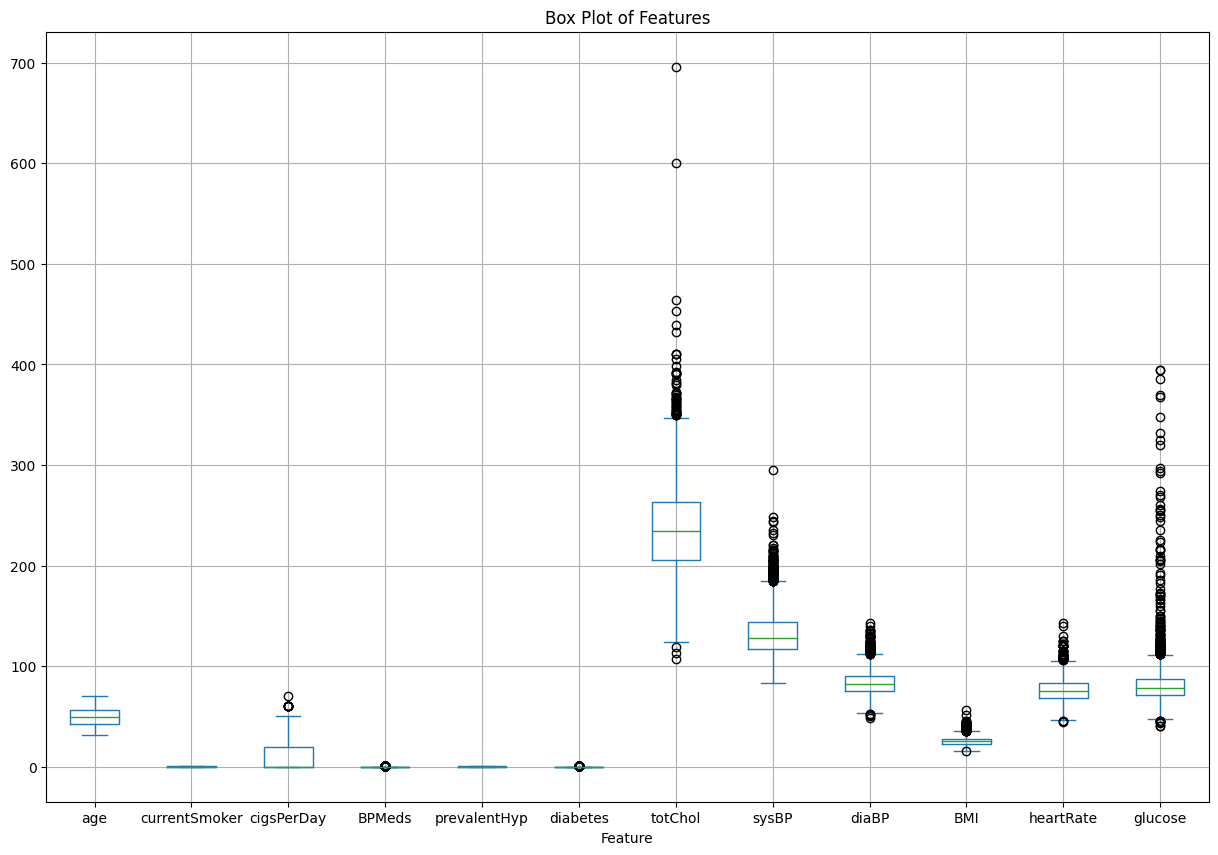

In [ ]:
df.plot(kind='box',figsize=(15, 10))
plt.xlabel('Feature')
plt.title('Box Plot of Features')
plt.grid()
plt.show()

# Check consistency for currentSmoker and cigsPerDay

In [ ]:
df['cigsPerDay'].groupby(df['currentSmoker']).sum()

,cigsPerDay
currentSmoker,
0,0.0
1,37894.0


In [ ]:
df['Heart_ stroke'] = df['Heart_ stroke'].replace({'No':0,'yes':1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   int64  
dtypes: float64(8), int64(5), object(3)
memory usage: 529.9+ KB


# Show Correlation

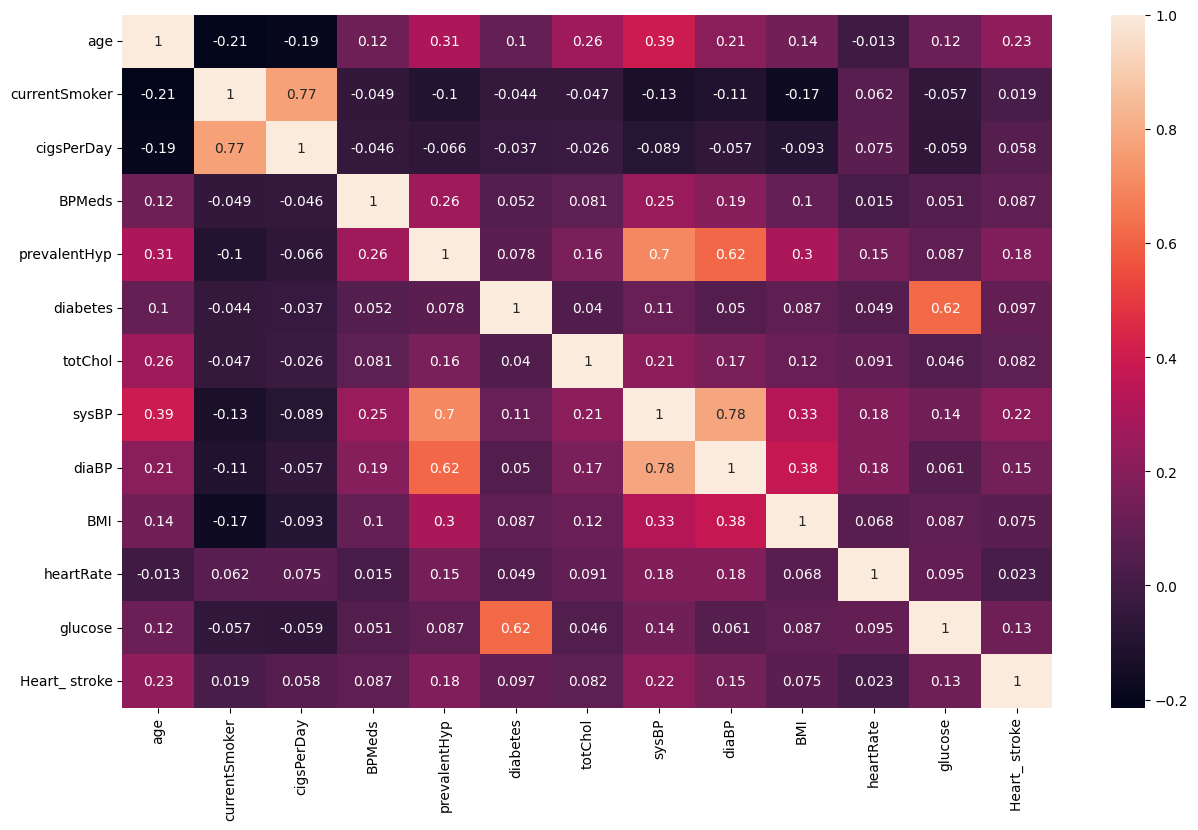

In [ ]:
plt.figure(figsize = (15,9))
correlation = df.drop(columns = ['Gender','education','prevalentStroke']).corr()
sb.heatmap(correlation,annot = True);

## Object Features



In [ ]:
df.describe(include = 'object')

,Gender,education,prevalentStroke
count,4238,4133,4238
unique,2,4,2
top,Female,uneducated,no
freq,2419,1720,4213


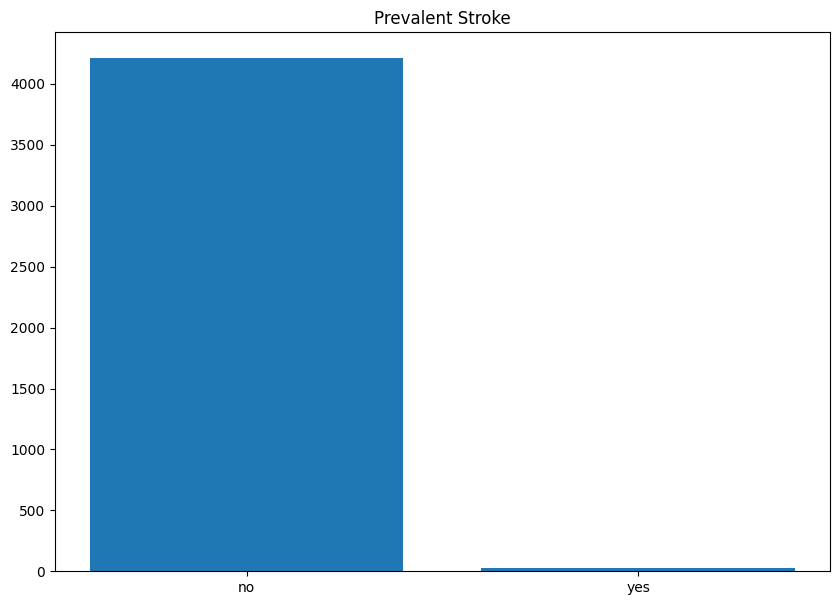

In [ ]:
plt.figure(figsize  = (10,7))
plt.bar(df['prevalentStroke'].value_counts().index , df['prevalentStroke'].value_counts().values )
plt.title('Prevalent Stroke')
plt.show()

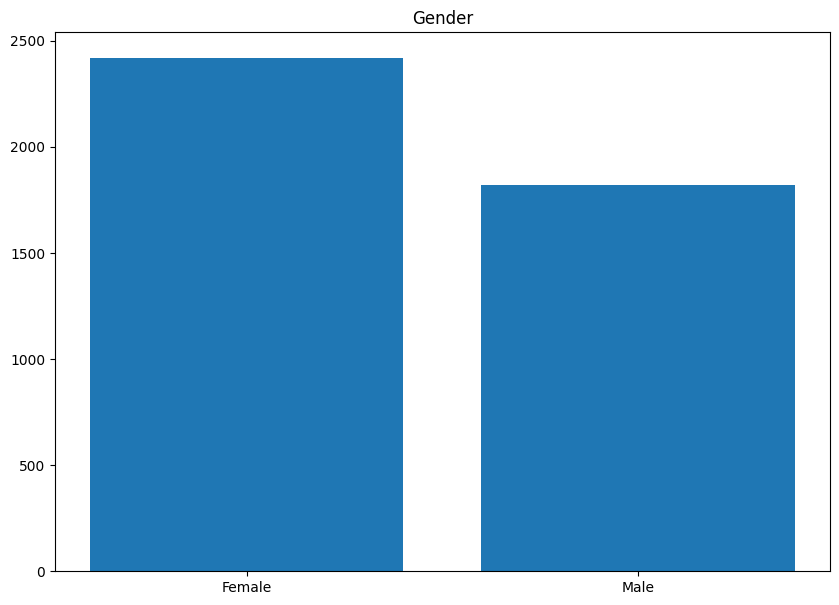

In [ ]:
plt.figure(figsize  = (10,7))
plt.bar(df['Gender'].value_counts().index , df['Gender'].value_counts().values )
plt.title('Gender')
plt.show()

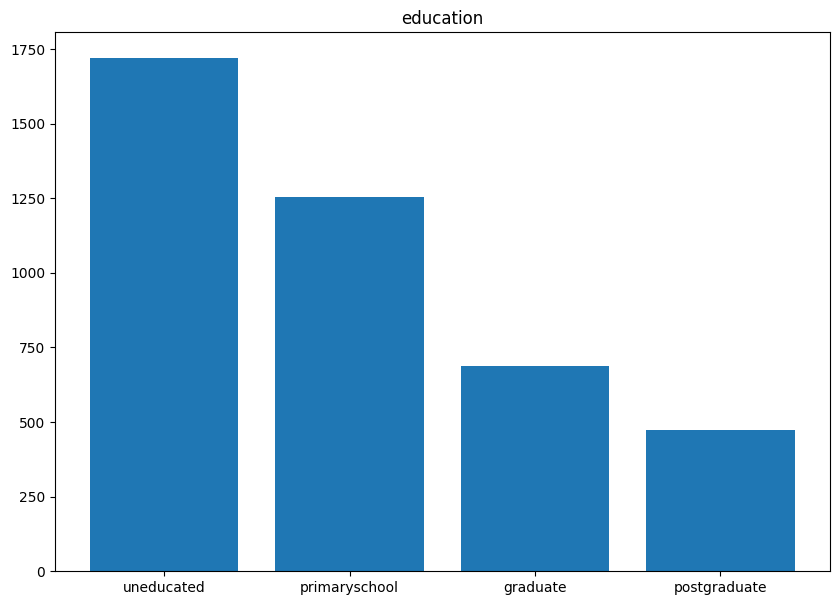

In [ ]:
plt.figure(figsize  = (10,7))
plt.bar(df['education'].value_counts().index , df['education'].value_counts().values )
plt.title('education')
plt.show()

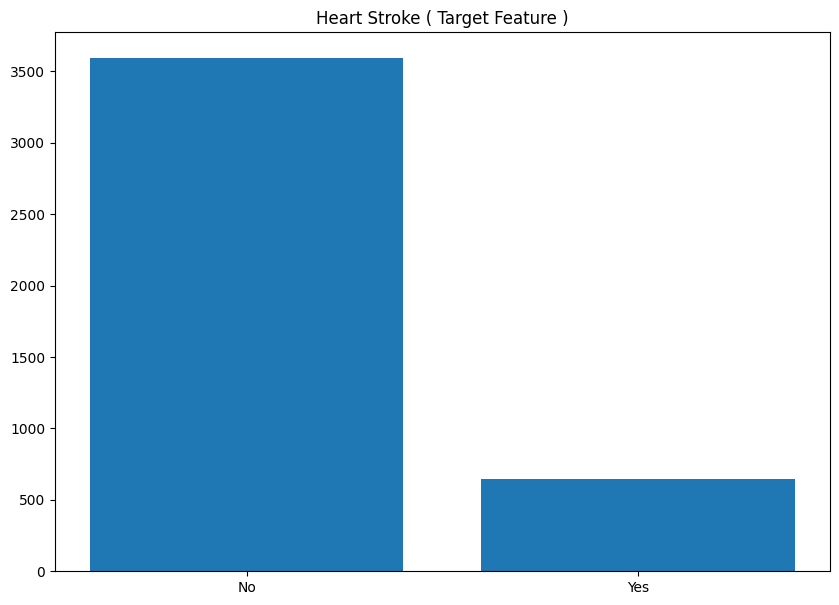

In [ ]:
plt.figure(figsize  = (10,7))
plt.bar(['No','Yes'], df['Heart_ stroke'].value_counts().values )
plt.title('Heart Stroke ( Target Feature )')
plt.show()

# Data Cleaning and Preprocessing

In [ ]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   object 
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   object 
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  Heart_ stroke    3656 non-null   int64  
dtypes: float64(8), int64(5), object(3)
memory usage: 485.6+ KB


# We can not drop missing values (0.14 from data) which is more than 10%  so, we need to fill missing values



In [ ]:
len_original = len(df)
rate_missing = 1 - (len(df.dropna()) / len_original)
print(f'We can not drop missing values ({round(rate_missing,2)} from data) which is more than 10%  so, we need to fill missing values')

We can not drop missing values (0.14 from data) which is more than 10%  so, we need to fill missing values


# Wrangle Function For Data Preprocessing

In [ ]:
def wrangle(path):
    df = pd.read_csv(path)

    df = df.drop(columns = ['prevalentStroke'])
    # convert ordinal data into numerical
    encoder = OrdinalEncoder()
    df["education"] = encoder.fit_transform(df[["education"]])

    df['Gender']  = df['Gender'].replace({'Female':0,'Male':1})
    df['Heart_ stroke'] = df['Heart_ stroke'].replace({'No':0,'yes':1})

    # using KNN algorithm fill missing values
    imputer = KNNImputer()
    df_impute = imputer.fit_transform(df)
    df = pd.DataFrame(df_impute, columns=df.columns)

    # drop multicollinearlity features
    df.drop(columns = ['currentSmoker','diaBP'], inplace = True)
    # drop low correlaction
    df.drop(columns = ['heartRate'], inplace = True)

    # Working on outliers with z-scores for each numeric column
    numeric_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'glucose']
    z_scores = stats.zscore(df[numeric_columns])
    threshold = 2.5
    outlier_indices = (z_scores > threshold).any(axis=1)
    df = df[~outlier_indices]
    # there are 3 outlier values z-score can not deal with it
    q1 = df['totChol'].quantile(0.25)
    q3 = df['totChol'].quantile(0.75)
    iqr = q3 - q1
    d = 1.5
    df = df[df['totChol'] > q1 - d * iqr]


    return df

In [ ]:
df = wrangle(path)

In [ ]:
df.sample(10)

,Gender,age,education,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,Heart_ stroke
16,1.0,48.0,0.0,10.0,0.0,1.0,0.0,232.0,138.0,22.37,72.0,0.0
4047,1.0,37.0,3.0,20.0,0.0,0.0,0.0,315.0,118.0,22.52,70.0,0.0
1482,0.0,40.0,2.0,0.0,0.0,0.0,0.0,185.0,117.5,21.12,79.0,0.0
420,0.0,46.0,2.0,0.0,0.0,0.0,0.0,232.0,90.0,19.20,82.0,0.0
2291,0.0,45.0,3.0,0.0,0.0,0.0,0.0,238.0,127.5,27.73,78.0,0.0
1233,1.0,59.0,3.0,0.0,0.0,0.0,0.0,229.0,100.5,25.18,81.0,0.0
3154,1.0,35.0,2.0,20.0,0.0,0.0,0.0,200.0,131.0,23.93,70.0,0.0
3866,1.0,48.0,3.0,0.0,0.0,1.0,0.0,259.0,147.5,25.10,73.0,1.0
3600,0.0,47.0,3.0,20.0,0.0,1.0,0.0,226.0,122.5,24.62,68.0,0.0
2020,1.0,46.0,2.0,0.0,0.0,0.0,0.0,280.0,142.0,28.09,65.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3804 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         3804 non-null   float64
 1   age            3804 non-null   float64
 2   education      3804 non-null   float64
 3   cigsPerDay     3804 non-null   float64
 4   BPMeds         3804 non-null   float64
 5   prevalentHyp   3804 non-null   float64
 6   diabetes       3804 non-null   float64
 7   totChol        3804 non-null   float64
 8   sysBP          3804 non-null   float64
 9   BMI            3804 non-null   float64
 10  glucose        3804 non-null   float64
 11  Heart_ stroke  3804 non-null   float64
dtypes: float64(12)
memory usage: 386.3 KB


# Data Loss

In [ ]:
print(f'We loss: {round(1- (len(df)/len_original),2)} from data after preprocessing')

We loss: 0.1 from data after preprocessing


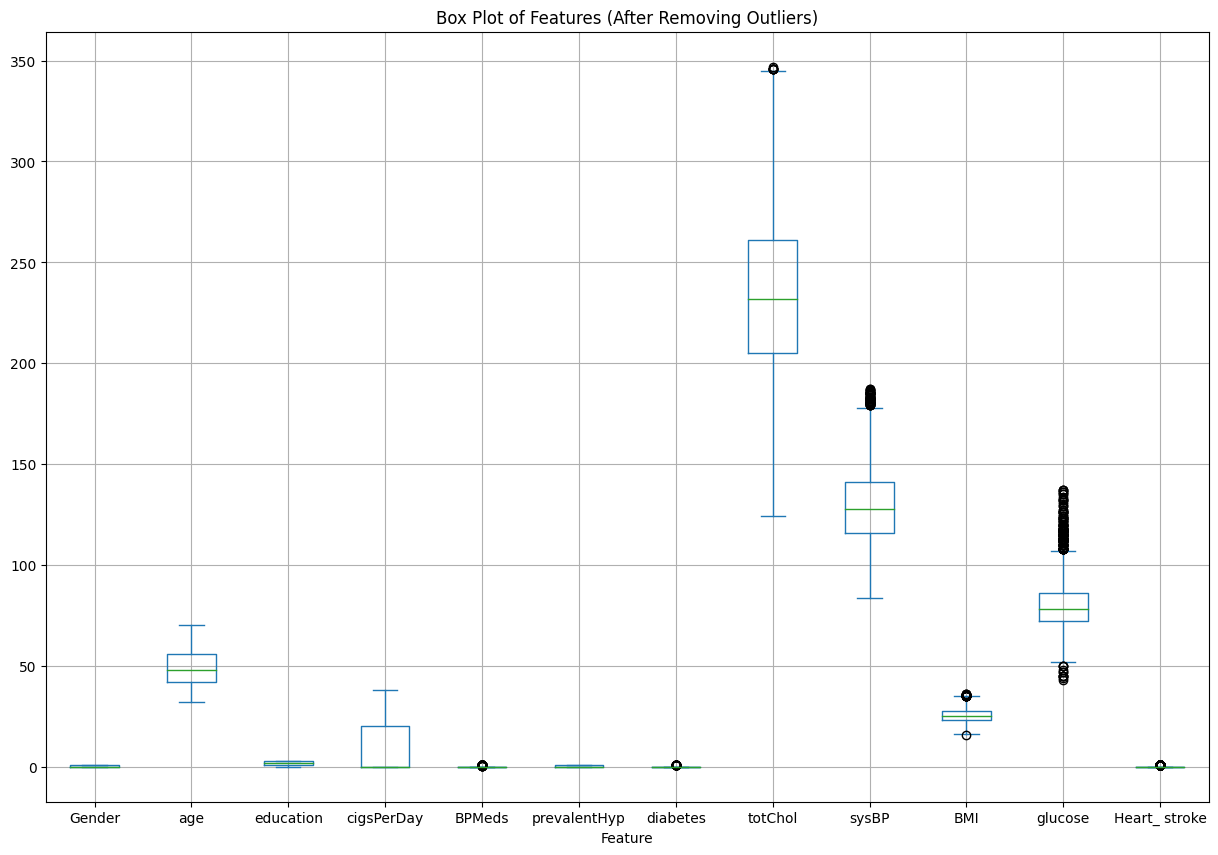

In [ ]:
df.plot(kind='box',figsize=(15, 10))
plt.xlabel('Feature')
plt.title('Box Plot of Features (After Removing Outliers)')
plt.grid()
plt.show()

##  Important Categorical Features Using Chi Square
### - The two faetures are important

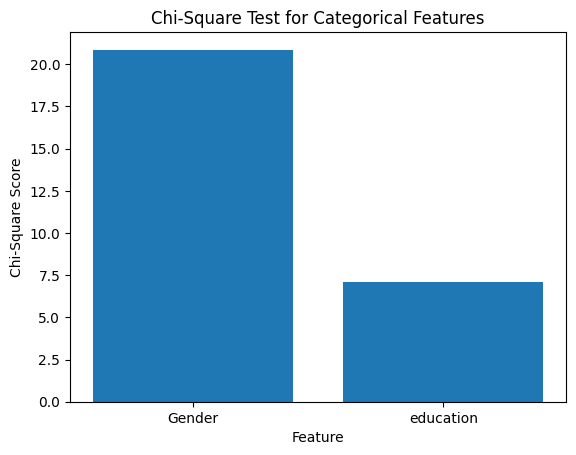

In [ ]:
categorical_features = ['Gender','education']
chi_scores, p_values = chi2(df[categorical_features], df['Heart_ stroke'])
plt.bar(categorical_features, chi_scores)
plt.xlabel('Feature')
plt.ylabel('Chi-Square Score')
plt.title('Chi-Square Test for Categorical Features')
plt.show()

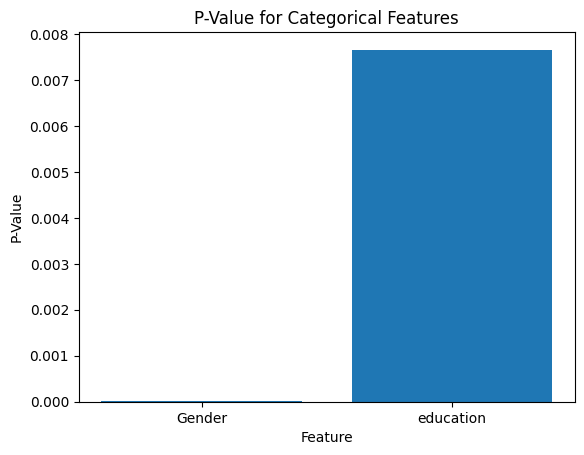

In [ ]:
plt.bar(categorical_features, p_values)
plt.xlabel('Feature')
plt.ylabel('P-Value')
plt.title('P-Value for Categorical Features')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3804 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         3804 non-null   float64
 1   age            3804 non-null   float64
 2   education      3804 non-null   float64
 3   cigsPerDay     3804 non-null   float64
 4   BPMeds         3804 non-null   float64
 5   prevalentHyp   3804 non-null   float64
 6   diabetes       3804 non-null   float64
 7   totChol        3804 non-null   float64
 8   sysBP          3804 non-null   float64
 9   BMI            3804 non-null   float64
 10  glucose        3804 non-null   float64
 11  Heart_ stroke  3804 non-null   float64
dtypes: float64(12)
memory usage: 386.3 KB


# Split Data into Features and Target

In [ ]:
target = 'Heart_ stroke'
X = df.drop(columns=target)
y = df[target]

print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (3804, 11)
y shape: (3804,)


# Imbalanced Class

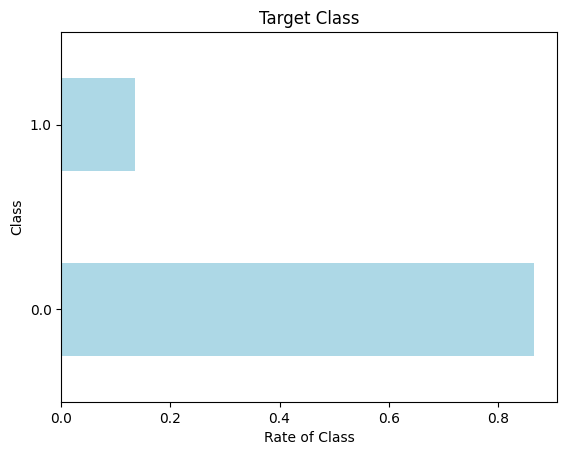

In [ ]:
df['Heart_ stroke'].value_counts(normalize=True).plot(kind = 'barh' , color = 'lightblue')
plt.xlabel('Rate of Class')
plt.ylabel('Class')
plt.title('Target Class');

# Solve Imbalance Class With Oversampling
### Oversampling Techniques:
- Random Oversampling: This technique randomly duplicates minority class samples to increase their     representation in the dataset.
- SMOTE (Synthetic Minority Over-sampling Technique): SMOTE creates synthetic samples for the minority class by interpolating between neighboring samples.
- ADASYN (Adaptive Synthetic Sampling): ADASYN generates synthetic samples for the minority class based on the density distribution of the data.

#Split Data Function
### You can pass X for features, y for target and Way for choose overampling technique.
- 0 for : No Resampling.
- 1 for : Adaptive Synthetic Sampling.
- 2 for : Synthetic Minority Over-sampling Technique.
- Otherwise : Random Oversampling.

In [ ]:
def split_data(X,y,way) :

    if way == 0 :
        X_train, X_test, y_train, y_test =train_test_split(X , y , test_size=0.2 , random_state=42)
    elif way == 1 :
        adasyn = ADASYN(random_state = 42)
        X, y = adasyn.fit_resample(X , y)
        X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
    elif way == 2 :
        S_oversampler = SMOTE(random_state=42)
        X, y = S_oversampler.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.2 , random_state=42)
    else :
        R_over_sample = RandomOverSampler(random_state=42)
        X, y = R_over_sample.fit_resample(X , y)
        X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(X,y,3)

# Fearure Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (5268, 11)
y_train shape: (5268,)
X_test shape: (1318, 11)
y_test shape: (1318,)


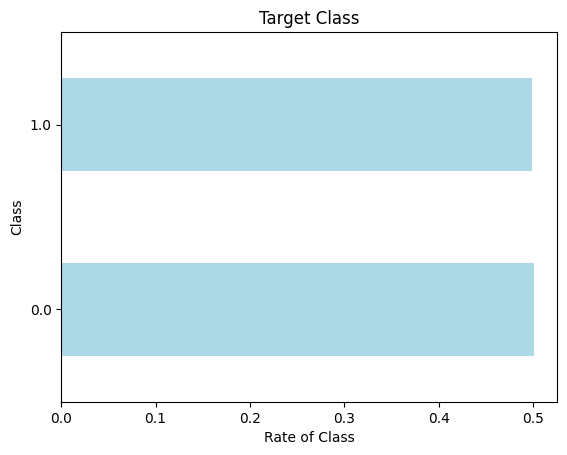

In [ ]:
y_train.value_counts(normalize=True).plot(kind = 'barh' , color = 'lightblue');
plt.xlabel('Rate of Class')
plt.ylabel('Class')
plt.title('Target Class');

# Model Building
### Techniques Used:
- SVM
- Decsion Tree
- Random Forest
- Gradient Bossting
- XGBoost
### While Not Used Techniques That May Struggle with Oversampled Data:
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Logistic Regression.



### SVM Model

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
print(svm_model.score(X_train, y_train))
print(svm_model.score(X_test, y_test))

0.7283599088838268
0.7169954476479514


In [ ]:
svm_model = SVC()

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid'],
}

grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print("Best Training Score: ", grid_search.best_score_)


y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Test Accuracy: {accuracy}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.01, kernel=poly; total time=   1.0s
[CV] END ................................C=0.01, kernel=poly; total time=   1.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.9s
[CV] END ................................C=0.01, kernel=poly; total time=   1.3s
[CV] END ................................C=0.01, kernel=poly; total time=   1.6s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.7s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.1s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.1s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.1s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.1s
[CV] END .............................C=0.01, kernel=sigmoid; total time=   1.4s
[CV] END .............................C=0.01, ke

## DecisionTree Model

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.9332321699544764


In [ ]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 30,40,50,70, 100],


}

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Training Score: ", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Best Parameters:  {'criterion': 'entropy', 'max_depth': 50}
Best Training Score:  0.9104011129311573
Test Accuracy: 0.9347496206373292


# Random Forest Model

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.9848254931714719


In [ ]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50,60],
    'criterion': ['gini', 'entropy'],

}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Training Score: ", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Best Parameters:  {'criterion': 'gini', 'max_depth': 40, 'n_estimators': 150}
Best Training Score:  0.9603275001756975
Test Accuracy: 0.9855842185128983


## Gradient Boosting Model

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_test = gb.predict(X_test)
y_pred_train = gb.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.7638572513287776
0.7397572078907435


In [ ]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],

}

In [ ]:
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Training Score: ", grid_search.best_score_)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Training Score:  0.9457110884055855
Test Accuracy: 0.9635811836115327


## XGBoost Model

In [ ]:
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)
y_pred_test = xg.predict(X_test)
y_pred_train = xg.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.996962794229309
0.9408194233687405


In [ ]:
xg = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample' : [0.4, 0.6, 0.8, 1.0]

}

In [ ]:
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Training Score: ", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Training Score:  0.9436237833781863
Test Accuracy: 0.9522003034901366


# Models Performance and Comparison

In [ ]:
svm_model = SVC(C = 10, kernel = 'rbf',probability=True)
dt_model  = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=5)
rf_model = RandomForestClassifier(criterion = 'gini', max_depth = 40, n_estimators = 150)
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=200)
xg_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8)

In [ ]:
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
acc_test_svm = svm_model.score(X_test, y_test)
acc_test_dt = dt_model.score(X_test, y_test)
acc_test_rf = rf_model.score(X_test, y_test)
acc_test_gb = gb_model.score(X_test, y_test)
acc_test_xg = xg_model.score(X_test, y_test)

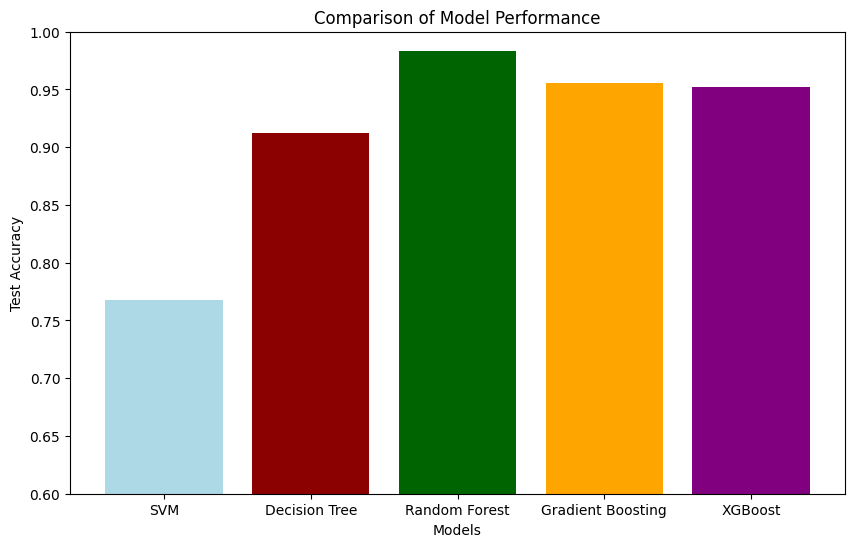

In [ ]:
models = ['SVM','Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
accuracies = [acc_test_svm, acc_test_dt, acc_test_rf, acc_test_gb, acc_test_xg]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['lightblue', 'darkred','darkgreen', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Performance')
plt.ylim([0.6, 1.0])
plt.show()


# ROC Curve

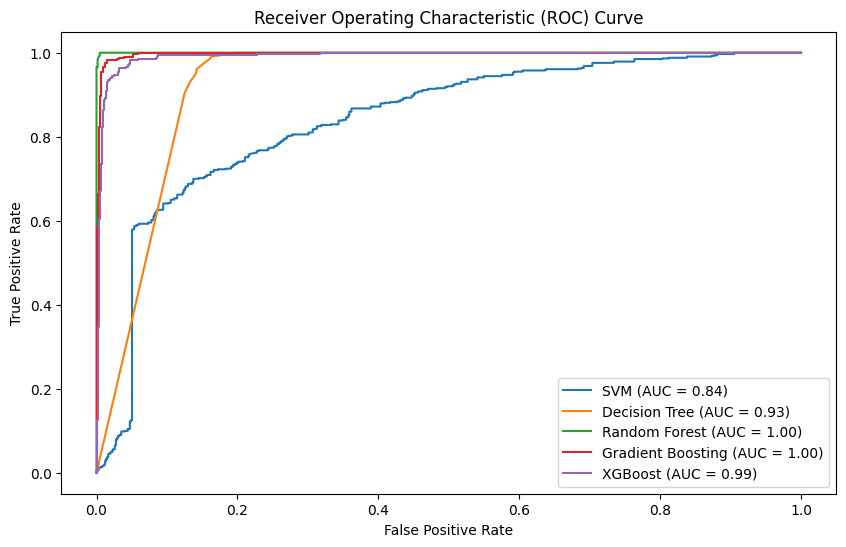

In [ ]:
models = [
    ('SVM',  svm_model.predict_proba(X_test)[:, 1]),
    ('Decision Tree', dt_model.predict_proba(X_test)[:, 1]),
    ('Random Forest', rf_model.predict_proba(X_test)[:, 1]),
    ('Gradient Boosting', gb_model.predict_proba(X_test)[:, 1]),
    ('XGBoost', xg_model.predict_proba(X_test)[:, 1])
 ]

plt.figure(figsize=(10, 6))

for model_name, y_pred_proba in models:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Champion Model: Random Forest

In [ ]:
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       655
         1.0       0.97      1.00      0.98       663

    accuracy                           0.98      1318
   macro avg       0.98      0.98      0.98      1318
weighted avg       0.98      0.98      0.98      1318



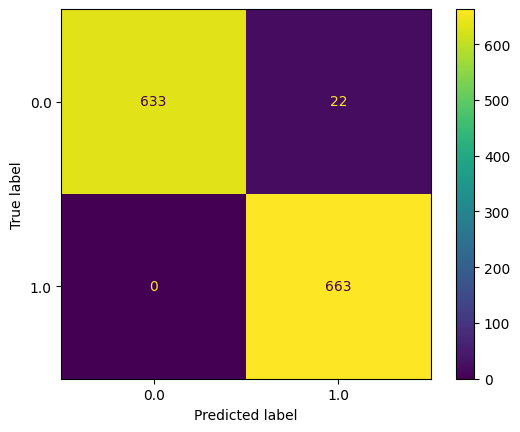

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model,X_test ,y_test);